# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

n_train = len(y_train)
n_validation = len(y_valid)
n_test = len(y_test)
image_shape = X_train[0].shape
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

def plot_images_rgb(X_data, y_data, N_row, N_col):
    plt.figure(figsize = (16,16*N_row/N_col))
    gs = gridspec.GridSpec(N_row,N_col)
    gs.update(wspace=0.01, hspace=0.02) # set the spacing between axes.

    for i in range(X_data.shape[0]):
        ax = plt.subplot(gs[i])
        ax.set_aspect('equal')
        plt.imshow(X_data[i])
        plt.text(1,4,str(y_data[i]),color='k',backgroundcolor='y')
        plt.axis('off')

In [4]:
def plot_signs_all(X_data, y_data):
    plt.figure(figsize = (16,12))
    gs = gridspec.GridSpec(6,8)
    gs.update(wspace=0.05, hspace=0.05) # set the spacing between axes.

    for i in range (len(np.unique(y_data))):
        images = X_data[y_data == i]
        idx = np.random.randint(0, len(images))
        ax = plt.subplot(gs[i])
        ax.set_aspect('equal')
        plt.imshow(images[idx])
        plt.text(1,4,str(i),color='k',backgroundcolor='y')
        plt.axis('off')

Plot the German Traffic Signs 

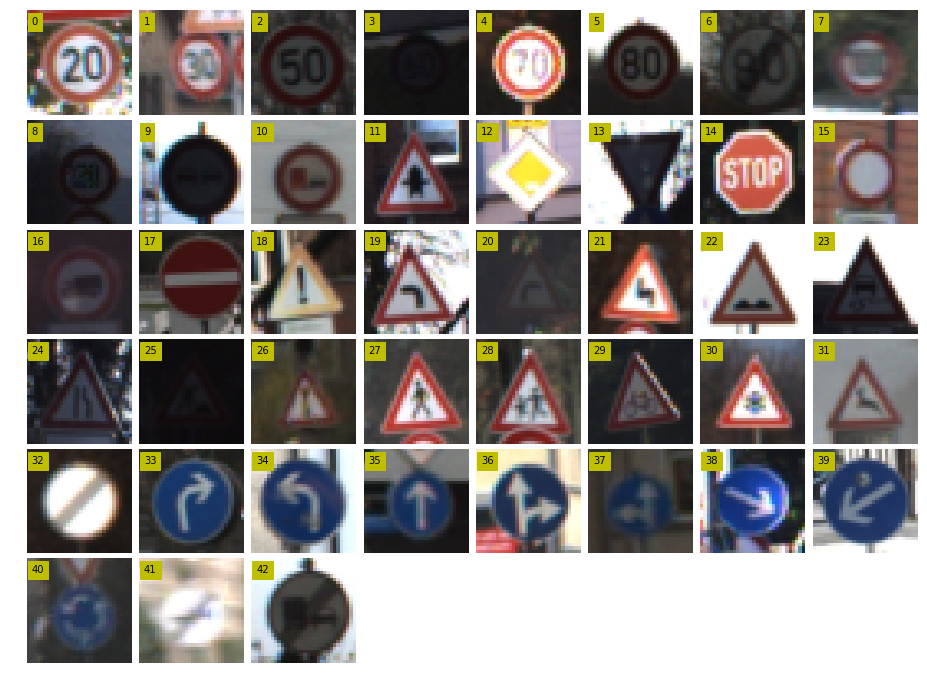

In [5]:
plot_signs_all(X_train, y_train)

Calculate the count of each sign

In [6]:
import pandas as pd

signs_pd = pd.read_csv('signnames.csv')
signs_num_train = np.array([sum(y_train == i) for i in range(len(np.unique(y_train)))])
signs_num_valid = np.array([sum(y_valid == i) for i in range(len(np.unique(y_valid)))])
signs_num_test = np.array([sum(y_test == i) for i in range(len(np.unique(y_test)))])
signs_pd['NumTrain'] = pd.Series(signs_num_train)
signs_pd['NumValid'] = pd.Series(signs_num_valid)
signs_pd['NumTest'] = pd.Series(signs_num_test)

signs_pd

,ClassId,SignName,NumTrain,NumValid,NumTest
0,0,Speed limit (20km/h),180,30,60
1,1,Speed limit (30km/h),1980,240,720
2,2,Speed limit (50km/h),2010,240,750
3,3,Speed limit (60km/h),1260,150,450
4,4,Speed limit (70km/h),1770,210,660
5,5,Speed limit (80km/h),1650,210,630
6,6,End of speed limit (80km/h),360,60,150
7,7,Speed limit (100km/h),1290,150,450
8,8,Speed limit (120km/h),1260,150,450
9,9,No passing,1320,150,480


Plot the traffic signs distribution in the training set

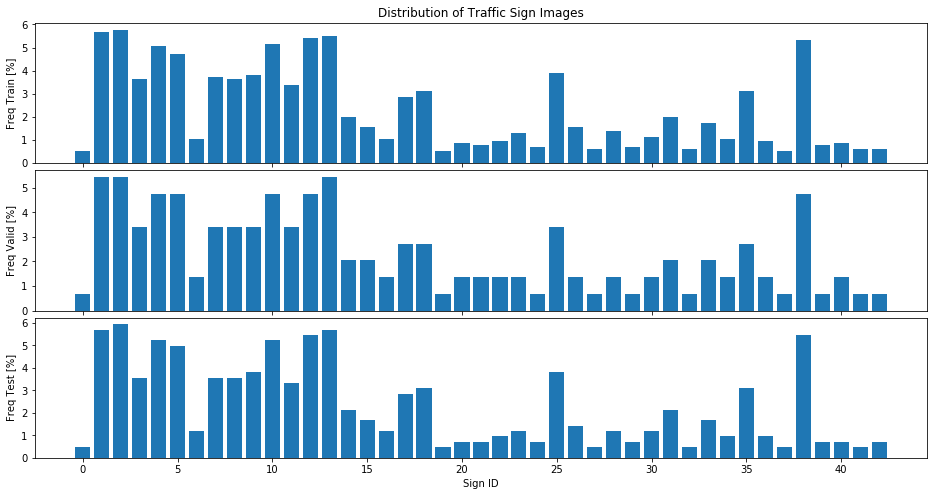

In [7]:
plt.figure(figsize = (16,8))
gs = gridspec.GridSpec(3,1)
gs.update(wspace=0.05, hspace=0.05) # set the spacing between axes.
    
plt.subplot(gs[0])
plt.bar(range(43),signs_num_train*100.0/np.sum(signs_num_train))
plt.ylabel('Freq Train [%]')
plt.title('Distribution of Traffic Sign Images')

plt.subplot(gs[1])
plt.bar(range(43),signs_num_valid*100.0/np.sum(signs_num_valid))
plt.ylabel('Freq Valid [%]')

plt.subplot(gs[2])
plt.bar(range(43),signs_num_test*100.0/np.sum(signs_num_test))
plt.xlabel('Sign ID')
plt.ylabel('Freq Test [%]')
plt.xticks(np.arange(0,43,5), (np.arange(0,43,5)))
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
# image augmentation
from imgaug import augmenters as iaa

seq = iaa.Sequential([
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.75, 1.5)),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_px={"x": (-2, 2), "y": (-2, 2)},
        rotate=(-15, 15)
    )
], random_order=True) # apply augmenters in random order

In [9]:
def augment_images(X_data, y_data, N_aug=5):
    X_aug = np.zeros((X_data.shape[0]*N_aug, X_data.shape[1], X_data.shape[2], X_data.shape[3]), dtype=np.uint8)
    y_aug = np.zeros((X_data.shape[0]*N_aug), dtype=np.uint8)
    for i in range(len(X_data)):
        images = np.array([X_data[i] for _ in range(N_aug)], dtype=np.uint8)
        images_aug = seq.augment_images(images)
        X_aug[i*N_aug:(i+1)*N_aug] = images_aug
        y_aug[i*N_aug:(i+1)*N_aug] = y_data[i]
    
    return X_aug, y_aug

Apply Histogram Equalization and normalization

In [10]:
import cv2

def pre_process_image(image):
    # histogram equalization of RGB image
    img_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    image = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    # normalization in range [-0.5, 0.5]
    image = image/255.0 - 0.5
    return image

def pre_process_images(images):
    return np.array([pre_process_image(images[i]) for i in range(len(images))])

Visualization of data augmentation and pre-processing

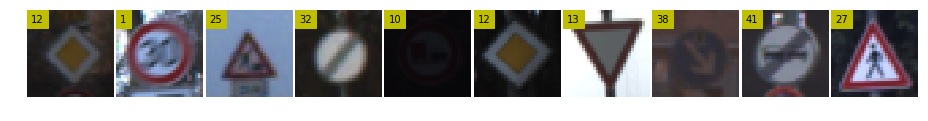

In [11]:
# original images
index = np.random.randint(0, len(X_train), size=10)
images = X_train[index]
labels = y_train[index]

plot_images_rgb(images,labels,1,10)

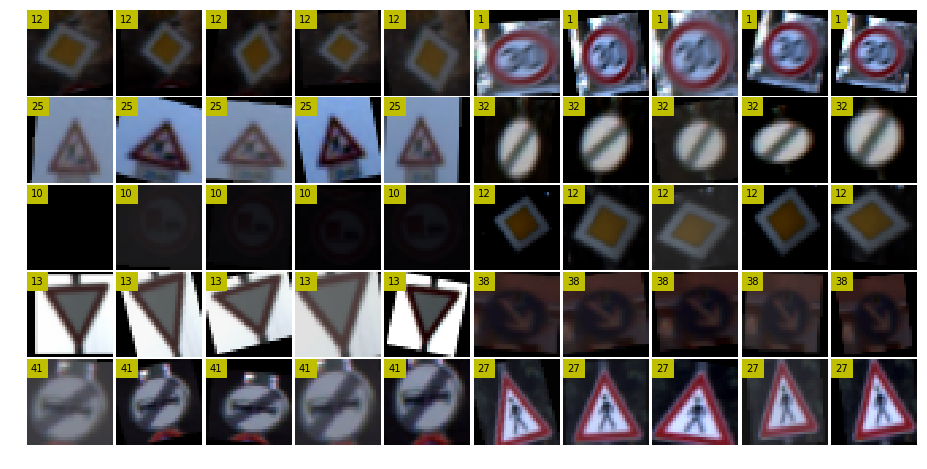

In [12]:
# image augmentation
images_aug, labels_aug = augment_images(images, labels)
plot_images_rgb(images_aug,labels_aug,5,10)

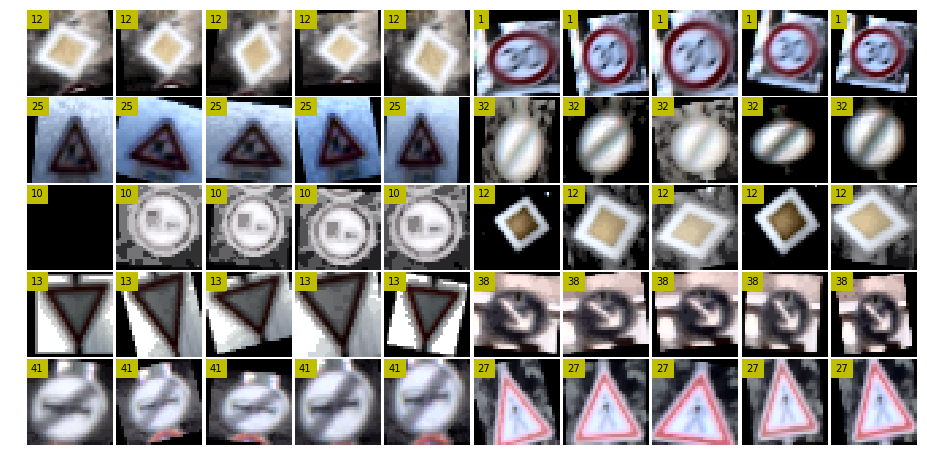

In [13]:
# pre-processing
images_aug_pp = pre_process_images(images_aug)
plot_images_rgb(images_aug_pp+0.5,labels_aug,5,10)

Augmentation of the traning set

In [14]:
X_train_aug, y_train_aug = augment_images(X_train, y_train, N_aug=5)
X_train = np.concatenate((X_train, X_train_aug), axis=0)
y_train = np.concatenate((y_train, y_train_aug), axis=0)

print("Number of augmented training examples =", len(y_train))

Number of augmented training examples = 208794


Pre-process all the data sets

In [15]:
X_train = pre_process_images(X_train)
X_valid = pre_process_images(X_valid)
X_test = pre_process_images(X_test)

### Model Architecture

In [16]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Parameters
EPOCHS = 25
BATCH_SIZE = 128
learning_rate = 0.0001
dropout = 0.5  # Dropout, probability to keep units
n_classes = 43 # Total classes of Traffic signs

In [17]:
def con2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME') + b
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1,k,k,1], strides = [1,k,k,1], padding="SAME")

def fc2d(x, W, b):
    x = tf.matmul(x, W) + b
    return tf.nn.relu(x)

Features and Labels

In [18]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

Weights and Biases

In [19]:
mu = 0
sigma = 0.1

# Store layers weight & bias
weights = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, 3, 32], mu, sigma)),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 32, 64], mu, sigma)),
    'wc3': tf.Variable(tf.truncated_normal([5, 5, 64, 128], mu, sigma)),
    'wd1': tf.Variable(tf.truncated_normal([4*4*128, 256], mu, sigma)),
    'wd2': tf.Variable(tf.truncated_normal([256, 128], mu, sigma)),
    'wd3': tf.Variable(tf.truncated_normal([128, n_classes], mu, sigma))}

biases = {
    'bc1': tf.Variable(tf.zeros(32)),
    'bc2': tf.Variable(tf.zeros(64)),
    'bc3': tf.Variable(tf.zeros(128)),
    'bd1': tf.Variable(tf.zeros(256)),
    'bd2': tf.Variable(tf.zeros(128)),
    'bd3': tf.Variable(tf.zeros(n_classes))}

Implement ConvNet

In [20]:
# Layer 1: 5x5 Convolutional. Input = 32x32x3. Output = 32x32x32.
conv1 = con2d(x, weights['wc1'], biases['bc1'])
# 2x2 Pooling. Output = 16x16x32.
conv1 = maxpool2d(conv1, k=2)

# Layer 2: 5x5 Convolutional. Output = 16x16x64.
conv2 = con2d(conv1, weights['wc2'], biases['bc2'])
# 2x2 Pooling. Output = 8x8x64.
conv2 = maxpool2d(conv2, k=2)

# Layer 3: 5x5 Convolutional. Output = 8x8x128.
conv3 = con2d(conv2, weights['wc3'], biases['bc3'])
# 2x2 Pooling. Output = 4x4x128.
conv3 = maxpool2d(conv3, k=2)

# Layer 4: Fully Connected. Input = 1024. Output = 256.
fc1 = fc2d(flatten(conv3), weights['wd1'], biases['bd1'])
fc1 = tf.nn.dropout(fc1, keep_prob)

# Layer 5: Fully Connected. Input = 256. Output = 128.
fc2 = fc2d(fc1, weights['wd2'], biases['bd2'])
fc2 = tf.nn.dropout(fc2, keep_prob)

# Layer 6: Fully Connected. Input = 128. Output = 43.
logits = fc2d(fc2, weights['wd3'], biases['bd3'])

Training Pipeline

In [21]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss_operation)

Model Evaluation

In [22]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [23]:
### Train the model
if not os.path.exists('saved_models'):
    os.mkdir("saved_models")

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        # rewrite due to memory error
        # X_train, y_train = shuffle(X_train, y_train)
        idx_rand = shuffle(np.arange(len(y_train)))
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            # rewrite due to memory error            
            #batch_x, batch_y = X_train[offset:end|], y_train[offset:end]
            batch_x, batch_y = X_train[idx_rand[offset:end]], y_train[idx_rand[offset:end]]
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {0:3},    Validation Accuracy = {1:.3f}".format(i+1, validation_accuracy))
        
    saver.save(sess, 'saved_models/ConvNet.ckpt')
    print("Model saved")

Training...

EPOCH   1,    Validation Accuracy = 0.456
EPOCH   2,    Validation Accuracy = 0.613
EPOCH   3,    Validation Accuracy = 0.707
EPOCH   4,    Validation Accuracy = 0.797
EPOCH   5,    Validation Accuracy = 0.846
EPOCH   6,    Validation Accuracy = 0.883
EPOCH   7,    Validation Accuracy = 0.918
EPOCH   8,    Validation Accuracy = 0.927
EPOCH   9,    Validation Accuracy = 0.935
EPOCH  10,    Validation Accuracy = 0.943
EPOCH  11,    Validation Accuracy = 0.955
EPOCH  12,    Validation Accuracy = 0.955
EPOCH  13,    Validation Accuracy = 0.962
EPOCH  14,    Validation Accuracy = 0.973
EPOCH  15,    Validation Accuracy = 0.970
EPOCH  16,    Validation Accuracy = 0.976
EPOCH  17,    Validation Accuracy = 0.976
EPOCH  18,    Validation Accuracy = 0.977
EPOCH  19,    Validation Accuracy = 0.979
EPOCH  20,    Validation Accuracy = 0.976
EPOCH  21,    Validation Accuracy = 0.980
EPOCH  22,    Validation Accuracy = 0.980
EPOCH  23,    Validation Accuracy = 0.983
EPOCH  24,    Validat

Calculate the accuracy of the trained model on the training, validation and test sets 

In [24]:
with tf.Session() as sess:
    saver.restore(sess, 'saved_models/ConvNet.ckpt')

    training_accuracy = evaluate(X_train, y_train)
    validation_accuracy = evaluate(X_valid, y_valid)
    test_accuracy = evaluate(X_test, y_test)
    
    print("Training Accuracy = {:.3f}".format(training_accuracy))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))    
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training Accuracy = 0.990
Validation Accuracy = 0.984
Test Accuracy = 0.967


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [25]:
name_images = os.listdir("new_images/")
print(name_images)

['double_curve_21.png', 'priority_road_12.png', 'road_work_25.png', 'slippery_road_23.png', 'speed_limit_50km_02.png']


Load, pre-process and normalize the new images

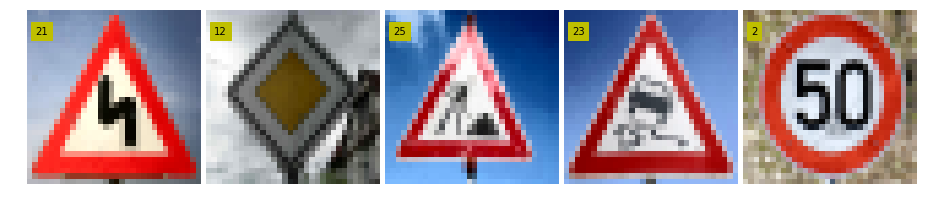

In [26]:
X_web = np.zeros((len(name_images), 32, 32, 3), dtype=np.float64)
y_web = np.zeros(len(name_images), dtype=np.uint8)

for i in range(len(name_images)):
    # Read in the image
    image = cv2.imread('new_images/'+name_images[i])
    # Brighness normalization
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])  
    # Resize
    resized = cv2.resize(img_yuv, (32,32), interpolation = cv2.INTER_AREA)
    image = cv2.cvtColor(resized, cv2.COLOR_YUV2RGB)
    # normalization
    X_web[i] = image/255.0 - 0.5
    # assign labels
    y_web[i] = np.array(name_images[i][-6:-4]).astype(np.uint8)
    
plot_images_rgb(X_web+0.5,y_web,1,5)

### Predict the Sign Type for Each Image

In [27]:
with tf.Session() as sess:
    saver.restore(sess, 'saved_models/ConvNet.ckpt')
        
    y_pred = sess.run(tf.argmax(logits, 1), feed_dict={x: X_web, y: y_web, keep_prob: 1})
    print('Predicted Sign IDs = ', y_pred)

Predicted Sign IDs =  [21 12 25 23  2]


### Analyze Performance

In [28]:
with tf.Session() as sess:
    saver.restore(sess, 'saved_models/ConvNet.ckpt')
        
    accuracy = evaluate(X_web, y_web)
    print("Accuracy for New Images = {:.3f}".format(accuracy))

Accuracy for New Images = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

In [29]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
prob_softmax = tf.nn.softmax(logits)
pred_top5 = tf.nn.top_k(prob_softmax, k=5)

with tf.Session() as sess:
    saver.restore(sess, 'saved_models/ConvNet.ckpt')
    
    predictions_top5 = sess.run(pred_top5, feed_dict={x: X_web, y: y_web, keep_prob: 1})
    print("Top 5 Softmax Probabilities = ", predictions_top5.values)
    print()
    print("Top 5 Sign IDs = ", predictions_top5.indices)

Top 5 Softmax Probabilities =  [[  9.86654520e-01   7.57304858e-03   3.31277051e-03   2.33669649e-03
    1.02624595e-04]
 [  1.00000000e+00   4.35034765e-17   2.33097067e-19   1.53472945e-19
    7.60618665e-21]
 [  1.00000000e+00   1.45575498e-26   9.44737278e-27   8.25265269e-30
    8.10656564e-30]
 [  9.77074862e-01   1.44977570e-02   8.40452872e-03   2.14332504e-05
    7.20887499e-07]
 [  9.99996543e-01   3.46991555e-06   7.52101493e-14   9.26990062e-15
    1.09756465e-16]]

Top 5 Sign IDs =  [[21 11 30 18 27]
 [12 13 32 42 17]
 [25 20 30 22 11]
 [23 20 30 29 31]
 [ 2  1  5  4  7]]


Plot the certainty of the model's predictions

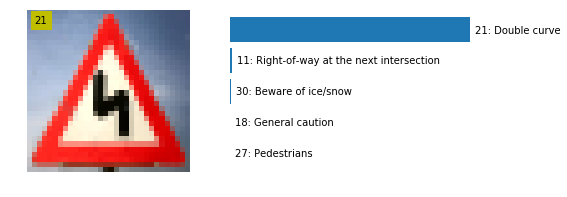

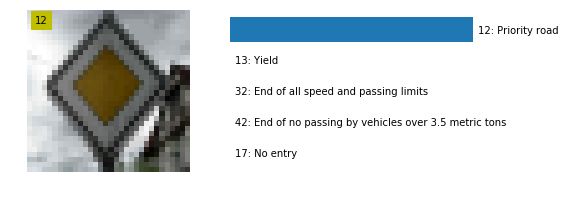

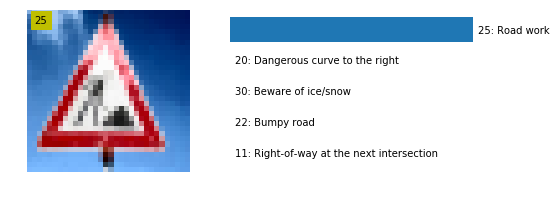

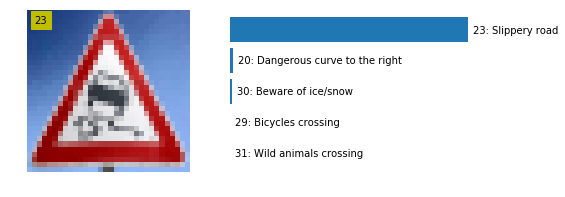

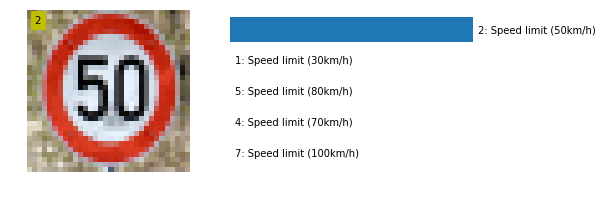

In [30]:
for i in range(len(y_web)):
    plt.figure(figsize = (8,3))
    gs = gridspec.GridSpec(1, 2, width_ratios=[2,3])
    ax = plt.subplot(gs[0])
    ax.set_aspect('equal')
    plt.imshow(X_web[i]+.5)
    plt.text(1,2,str(y_web[i]),color='k',backgroundcolor='y')
    plt.axis('off')
    
    plt.subplot(gs[1])
    plt.barh(5-np.arange(5), predictions_top5.values[i], align='center')
    plt.xlim(xmax=1)
    for j in range(5):
        plt.text(predictions_top5.values[i][j]+0.02, 4.9-j,
                 str(predictions_top5.indices[i][j])+': '+signs_pd['SignName'][predictions_top5.indices[i][j]])
    plt.axis('off')

Calculate [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall) on the test set

In [31]:
def precision_recall(y_data, y_pred):
    num_SignId = len(np.unique(y_data))
    pr_data = np.zeros([num_SignId,2])
    for i in range(num_SignId):
        true_obsv = np.equal(y_pred, i)
        true_actual = np.equal(y_data, i)
        true_pos = np.logical_and(true_obsv, true_actual)
        num_obsv = np.sum(true_obsv.astype(np.float32))
        num_actual = np.sum(true_actual.astype(np.float32))
        num_pos = np.sum(true_pos.astype(np.float32))
        pr_data[i] = [num_pos/num_obsv, num_pos/num_actual]
    return pr_data

In [32]:
with tf.Session() as sess:
    saver.restore(sess, 'saved_models/ConvNet.ckpt')
        
    y_pred = sess.run(tf.argmax(logits, 1), feed_dict={x: X_test, y: y_test, keep_prob: 1})
    pr_test = precision_recall(y_test, y_pred)
    print(pr_test)

[[ 0.96551722  0.93333334]
 [ 0.98328692  0.98055553]
 [ 0.95140666  0.99199998]
 [ 0.97163123  0.91333336]
 [ 0.96546549  0.97424245]
 [ 0.91247976  0.89365077]
 [ 0.9852941   0.89333332]
 [ 0.94838709  0.98000002]
 [ 0.9642058   0.9577778 ]
 [ 0.99792099  1.        ]
 [ 0.99089527  0.98939395]
 [ 0.95127612  0.97619045]
 [ 0.98548621  0.98405796]
 [ 0.99034482  0.99722224]
 [ 1.          1.        ]
 [ 0.97169811  0.98095238]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 0.96045196  0.87179488]
 [ 0.89473683  0.85000002]
 [ 0.85294116  0.64444447]
 [ 0.92207789  0.78888887]
 [ 0.9910714   0.92500001]
 [ 0.89610392  0.92000002]
 [ 0.78761059  0.98888886]
 [ 0.95918369  0.97916669]
 [ 0.91052634  0.96111113]
 [ 0.89361703  0.69999999]
 [ 0.85029942  0.94666666]
 [ 0.81818181  1.        ]
 [ 0.83333331  0.80000001]
 [ 0.95340502  0.98518521]
 [ 0.93442625  0.94999999]
 [ 0.99526066  1.        ]
 [ 0.97560978  1.        ]
 [ 1.          0.9948718 ]
 [ 0.99173552  1.        ]
 

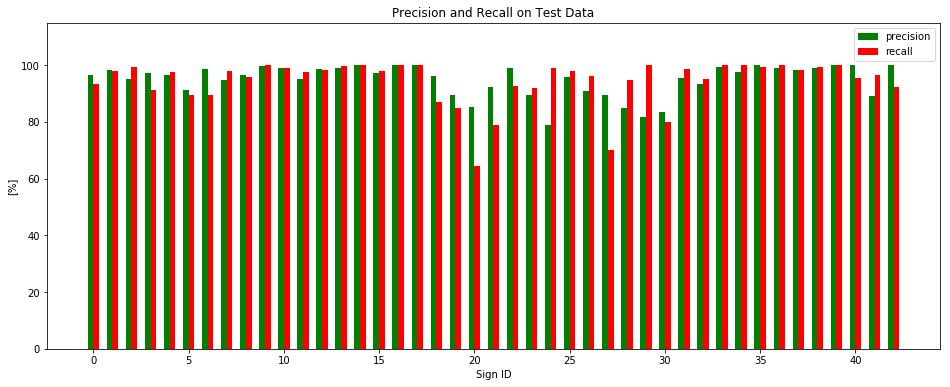

In [33]:
plt.figure(figsize = (16,6))  
plt.bar(np.arange(43)-0.15, pr_test[:,0]*100.0, width=0.3, color='g', align='center', label='precision')
plt.bar(np.arange(43)+0.15, pr_test[:,1]*100.0, width=0.3, color='r', align='center', label='recall')
plt.xlabel('Sign ID')
plt.ylabel('[%]')
plt.title('Precision and Recall on Test Data')
plt.legend()
plt.xticks(np.arange(0,43,5), (np.arange(0,43,5)))
plt.ylim(0,115)
plt.show()

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 

In [34]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

Plot ConvNet feature maps in the first convolutional layer

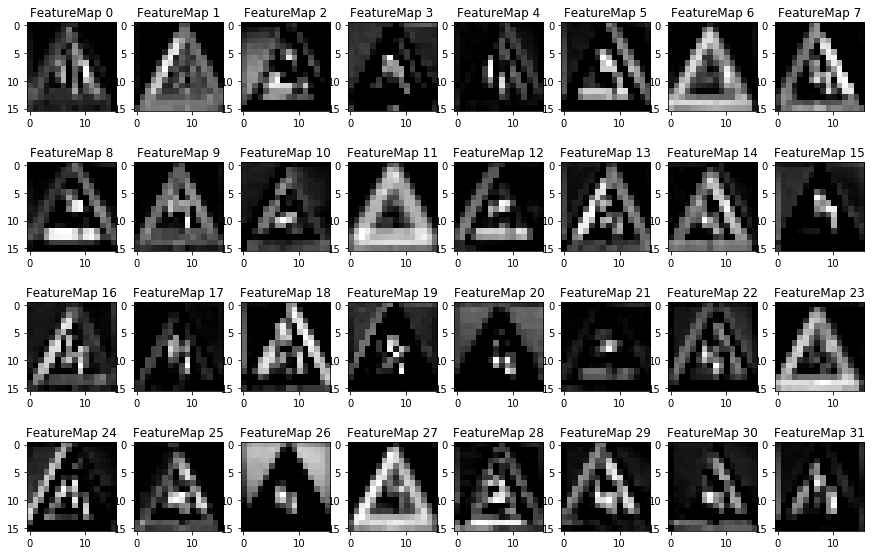

In [35]:
sess = tf.Session()
saver.restore(sess, 'saved_models/ConvNet.ckpt')

outputFeatureMap([X_web[0]], conv1)